### ***IMPORT NECESSARY LIBRARY***

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

### ***DOWNLOAD AND EXTRACT THE DATASET***

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d omkargurav/face-mask-dataset

# Extract the dataset
from zipfile import ZipFile
dataset = "face-mask-dataset.zip"
with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print("Dataset Extracted Successfully")

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset Extracted Successfully


### ***LOAD AND EXPLORE DATA***

In [3]:
# Define dataset paths
with_mask_path = "/content/data/with_mask/"
without_mask_path = "/content/data/without_mask/"

In [4]:
# List of files in each category
with_mask_files = os.listdir(with_mask_path)
without_mask_files = os.listdir(without_mask_path)

print("With Mask (First 5):", with_mask_files[:5])
print("Without Mask (First 5):", without_mask_files[:5])

With Mask (First 5): ['with_mask_3101.jpg', 'with_mask_1379.jpg', 'with_mask_538.jpg', 'with_mask_1042.jpg', 'with_mask_1605.jpg']
Without Mask (First 5): ['without_mask_1363.jpg', 'without_mask_143.jpg', 'without_mask_711.jpg', 'without_mask_1756.jpg', 'without_mask_99.jpg']


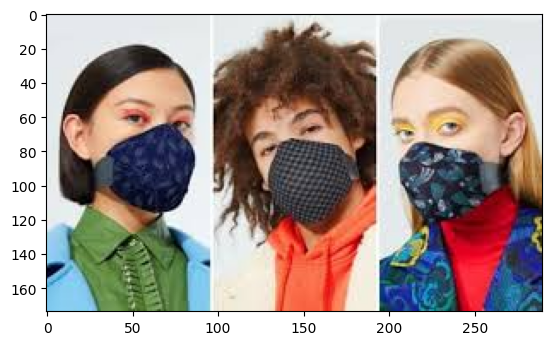

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/content/data/with_mask/with_mask_3101.jpg")
imgplot = plt.imshow(img)
plt.show()

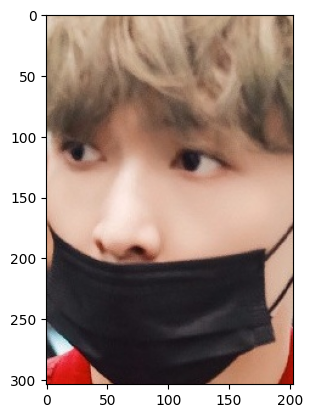

In [6]:
img = mpimg.imread("/content/data/with_mask/with_mask_538.jpg")
imgplot = plt.imshow(img)
plt.show()

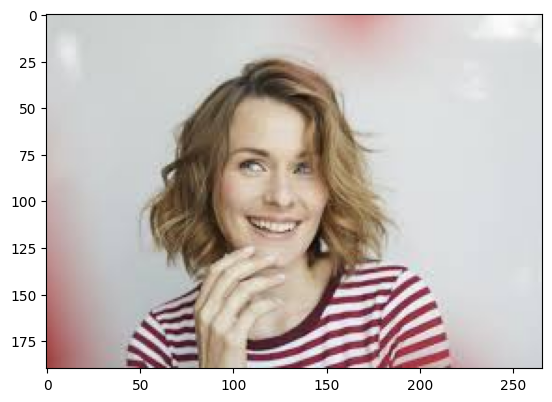

In [7]:
img = mpimg.imread("/content/data/without_mask/without_mask_711.jpg")
imgplot = plt.imshow(img)
plt.show()

In [8]:
# Dataset Distribution
print("Total With Mask Images:", len(with_mask_files))
print("Total Without Mask Images:", len(without_mask_files))

Total With Mask Images: 3725
Total Without Mask Images: 3828


### ***DATA PREPROCESSING***

In [9]:
# Assigned labels (1 for mask, 0 for no mask)
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)

# Combine labels
labels = with_mask_labels + without_mask_labels

In [10]:
# Load images and preprocess
def load_images(image_files, path):
  data=[]
  for img_file in image_files:
    image = Image.open(os.path.join(path, img_file))
    image = image.resize((128,128))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)
  return data

# Load data
data = load_images(with_mask_files, with_mask_path) + load_images(without_mask_files, without_mask_path)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [11]:
# Convert to numpy arrays
X = np.array(data)
y = np.array(labels)

# Display dataset shape
print("Dataset Shape:", X.shape)
print("Labels shape:", y.shape)

Dataset Shape: (7553, 128, 128, 3)
Labels shape: (7553,)


In [12]:
X

array([[[[229, 232, 237],
         [229, 232, 237],
         [229, 232, 237],
         ...,
         [239, 243, 244],
         [239, 243, 244],
         [239, 242, 247]],

        [[229, 232, 237],
         [229, 232, 237],
         [229, 232, 237],
         ...,
         [237, 241, 242],
         [237, 241, 242],
         [239, 242, 246]],

        [[229, 232, 237],
         [229, 232, 237],
         [229, 232, 237],
         ...,
         [233, 237, 238],
         [233, 237, 238],
         [233, 236, 240]],

        ...,

        [[126, 200, 239],
         [128, 202, 239],
         [130, 204, 240],
         ...,
         [ 38,  74,  83],
         [ 46,  66,  76],
         [ 38,  61,  78]],

        [[126, 200, 239],
         [128, 202, 240],
         [131, 205, 241],
         ...,
         [ 70, 114, 130],
         [ 57,  89, 111],
         [ 51,  74,  92]],

        [[127, 201, 240],
         [129, 203, 240],
         [132, 206, 242],
         ...,
         [ 79, 133, 159],
        

### ***SPLIT DATA INTO TRAIN AND TEST DATA***

In [13]:
# Split data (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [14]:
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (6042, 128, 128, 3)
Testing set: (1511, 128, 128, 3)


### ***BUILT CNN MODEL***

In [15]:
# Define CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation="softmax")
])

# Compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Display model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

### ***TRAIN THE MODEL***

In [16]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10, batch_size=32)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.7002 - loss: 0.7987 - val_accuracy: 0.8975 - val_loss: 0.2718
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8866 - loss: 0.2889 - val_accuracy: 0.9025 - val_loss: 0.2372
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9033 - loss: 0.2409 - val_accuracy: 0.9107 - val_loss: 0.2213
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9247 - loss: 0.2020 - val_accuracy: 0.9041 - val_loss: 0.2172
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9441 - loss: 0.1569 - val_accuracy: 0.9140 - val_loss: 0.2070
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9469 - loss: 0.1429 - val_accuracy: 0.9107 - val_loss: 0.2257
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9401 - loss: 0.1566 - val_accuracy: 0.9174 - val_loss: 0.2911
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9507 - loss: 0.1218 - val_acc

### ***MODEL EVALUATION***

In [17]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(f"Test Accuracy: {accuracy *100:2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9203 - loss: 0.3010
Test Accuracy: 92.322963%


### ***MODEL PERFORMANCE VISUALIZATION***

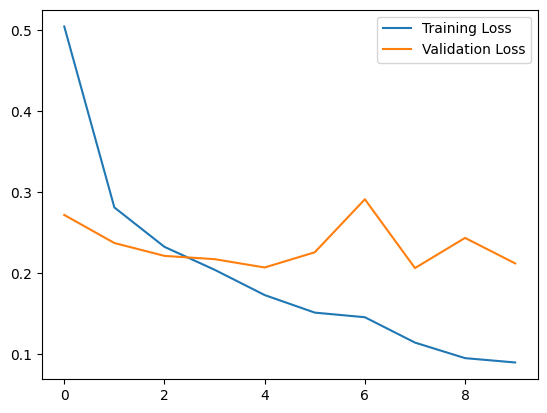

In [18]:
# Plot Training Loss & Validation Loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

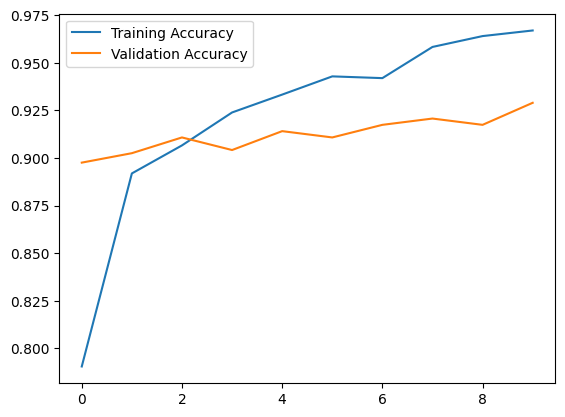

In [19]:
# Plot Training Accuracy & Validation Accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

### ***FACE MASK PREDICTION***

In [20]:
def predict_mask(image_path):
  input_image = cv2.imread(image_path)
  input_image_resized = cv2.resize(input_image, (128,128))
  input_image_scaled = input_image_resized / 255
  input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

  prediction = model.predict(input_image_reshaped)
  predicted_label = np.argmax(prediction)

  if predicted_label == 1:
    print("The person in the image is wearing a mask")
  else:
    print("The person in the image is NOT wearing a mask")